In [1]:
import matplotlib.pyplot as plt
from sksurv.datasets import load_whas500
from sksurv.linear_model import CoxPHSurvivalAnalysis

In [2]:
X, y = load_whas500()
X = X.astype(float)

In [13]:
X.describe()

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.156000,69.846000,0.02200,26.613780,0.310000,0.750000,78.266000,0.400000,87.018000,6.116000,0.342000,0.306000,0.044000,144.704000
std,0.363219,14.491456,0.14683,5.405655,0.462956,0.433446,21.545293,0.490389,23.586231,4.714127,0.474855,0.461291,0.205301,32.294865
min,0.000000,30.000000,0.00000,13.045460,0.000000,0.000000,6.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,57.000000
25%,0.000000,59.000000,0.00000,23.223775,0.000000,0.750000,63.000000,0.000000,69.000000,3.000000,0.000000,0.000000,0.000000,123.000000
50%,0.000000,72.000000,0.00000,25.945925,0.000000,1.000000,79.000000,0.000000,85.000000,5.000000,0.000000,0.000000,0.000000,141.500000
75%,0.000000,82.000000,0.00000,29.391963,1.000000,1.000000,91.250000,1.000000,100.250000,7.000000,1.000000,1.000000,0.000000,164.000000
max,1.000000,104.000000,1.00000,44.838860,1.000000,1.000000,198.000000,1.000000,186.000000,47.000000,1.000000,1.000000,1.000000,244.000000


In [21]:
y

array([(False, 2.178e+03), (False, 2.172e+03), (False, 2.190e+03),
       ( True, 2.970e+02), (False, 2.131e+03), ( True, 1.000e+00),
       (False, 2.122e+03), ( True, 1.496e+03), ( True, 9.200e+02),
       (False, 2.175e+03), (False, 2.173e+03), ( True, 1.671e+03),
       (False, 2.192e+03), ( True, 8.650e+02), (False, 2.166e+03),
       (False, 2.168e+03), ( True, 9.050e+02), ( True, 2.353e+03),
       (False, 2.146e+03), ( True, 6.100e+01), ( True, 2.358e+03),
       (False, 2.114e+03), (False, 2.132e+03), (False, 2.139e+03),
       (False, 2.048e+03), (False, 2.152e+03), ( True, 6.000e+00),
       (False, 2.156e+03), ( True, 1.180e+02), (False, 2.064e+03),
       ( True, 8.490e+02), ( True, 7.140e+02), (False, 2.057e+03),
       ( True, 2.000e+00), ( True, 7.000e+00), (False, 2.151e+03),
       ( True, 6.000e+00), ( True, 4.220e+02), ( True, 3.540e+02),
       (False, 2.065e+03), (False, 2.048e+03), ( True, 1.065e+03),
       ( True, 5.350e+02), (False, 2.118e+03), ( True, 9.700e+

In [14]:
estimator = CoxPHSurvivalAnalysis().fit(X, y)

In [15]:
chf_funcs = estimator.predict_cumulative_hazard_function(X.iloc[:10])

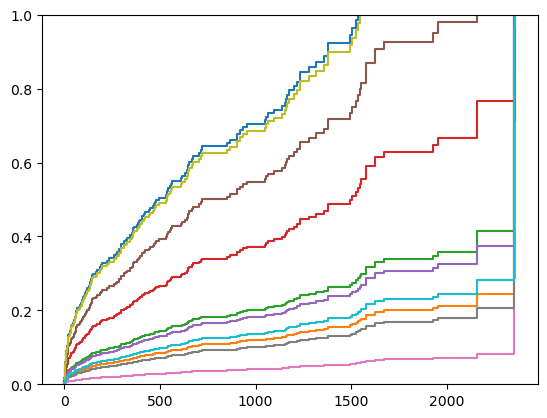

In [16]:
#fonction de hazard
for fn in chf_funcs:
    plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()

In [17]:
surv_funcs = estimator.predict_survival_function(X.iloc[:10])


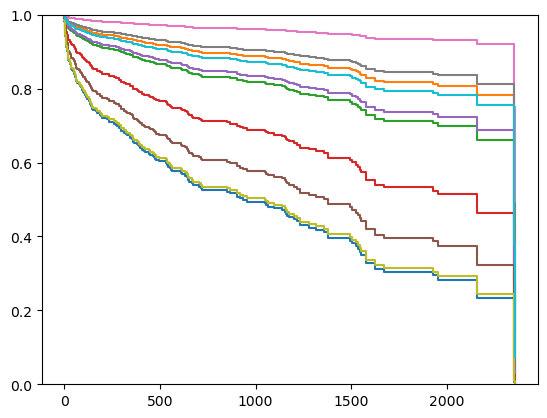

In [20]:
#probailité de survie
for fn in surv_funcs:
    #print(fn,fn(fn.x))
    plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()